In [1]:
###Practice SVM Made with ChatGPT's Help
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Paths to the training and testing data
base_path = 'Alzheimer_s Dataset'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

#Load datasets
batch_size = 32
target_size = (208, 176)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='int'
)

#Define preprocessing function
def preprocess_dataset(dataset, base_model):
    all_features = []
    all_labels = []

    for images, labels in dataset:
        #Convert grayscale images to RGB
        images = tf.image.grayscale_to_rgb(images)
        #Preprocess the images for VGG16
        images = preprocess_input(images)
        #Extract features
        features = base_model.predict(images)
        all_features.append(features)
        all_labels.append(labels.numpy())

    return np.vstack(all_features), np.concatenate(all_labels)

#Initialize VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*target_size, 3), pooling='avg')

#Extract features and labels
train_features, train_labels = preprocess_dataset(train_dataset, base_model)
test_features, test_labels = preprocess_dataset(test_dataset, base_model)

#Flatten the labels if they're one-hot encoded
train_labels = np.argmax(train_labels, axis=1) if train_labels.ndim > 1 else train_labels
test_labels = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels

#Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

#Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_features = scaler.transform(test_features)

#Train SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

#Validate the SVM classifier
val_predictions = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.4f}')

#Evaluate the SVM classifier on the test set
test_predictions = svm.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')


Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
1/1 [==============================] - 7s 7s/step


1/1 [==============================] - 9s 9s/step
Validation Accuracy: 0.7220
Test Accuracy: 0.5661


In [25]:
###Attempt to improve upon model
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Loading in the data
base_path = 'Alzheimer_s Dataset'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

#Set parameters for image processing 
target_size = (208, 176)
batch_size = 32

#Load Dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size = target_size,
    batch_size = batch_size,
    color_mode ='rgb'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size = target_size,
    batch_size = batch_size,
    color_mode = 'rgb'
)

#Function to extract features using VGG16
def extract_features(dataset):
    base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(*target_size, 3))
    all_features = []
    all_labels = []
    
    for images, labels in dataset:
        features = base_model.predict(images)
        pooled_features = tf.reduce_mean(features, axis=(1, 2)) #Global Average Pooling
        all_features.append(pooled_features.numpy())
        all_labels.extend(labels.numpy())
        
    return np.vstack(all_features), np.array(all_labels)

#Extract features
train_features, train_labels = extract_features(train_dataset)
test_features, test_labels = extract_features(test_dataset)

#Check the shape of the labels
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

#Flatten the labels if they are in one-hot encoded form
if len(train_labels.shape) > 1 and train_labels.shape[1] > 1:
    train_labels = np.argmax(train_labels, axis=1)
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # Adjust C and gamma as needed
svm_rbf.fit(train_features, train_labels)

# Evaluate the model
val_accuracy = svm_rbf.score(train_features, train_labels)
test_accuracy = svm_rbf.score(test_features, test_labels)

print(f"Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
1/1 [==============================] - 6s 6s/step
Train labels shape: (5121,)
Test labels shape: (1279,)
Validation Accuracy: 0.7211, Test Accuracy: 0.6130


In [26]:
#Results using previous code for feature extraction and preprocessing

# Train SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=6, C=1.0, gamma='scale')  # Adjust degree and C as needed
svm_poly.fit(train_features, train_labels)

# Evaluate the model
train_accuracy_poly = svm_poly.score(train_features, train_labels)
test_accuracy_poly = svm_poly.score(test_features, test_labels)

print(f"Train Accuracy (Polynomial Kernel): {train_accuracy_poly:.4f}")
print(f"Test Accuracy (Polynomial Kernel): {test_accuracy_poly:.4f}")


Train Accuracy (Polynomial Kernel): 0.9236
Test Accuracy (Polynomial Kernel): 0.6544


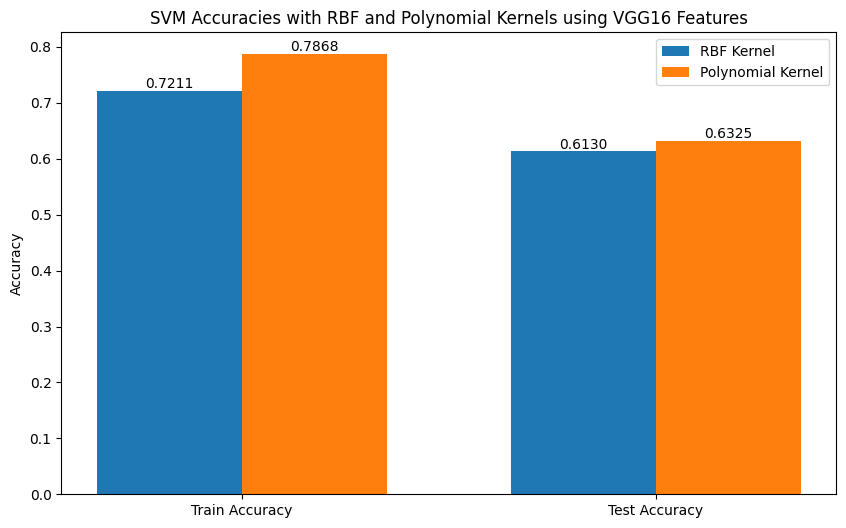

In [28]:
import matplotlib.pyplot as plt
import numpy as np
###VGG16 SVM Baseline Kernel Accuracy Comparison
#Using previous code for loading data and training SVM

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # Adjust C and gamma as needed
svm_rbf.fit(train_features, train_labels)

# Evaluate the model with RBF kernel
rbf_train_accuracy = svm_rbf.score(train_features, train_labels)
rbf_test_accuracy = svm_rbf.score(test_features, test_labels)

# Train SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', C=1.0, gamma='scale')  # Adjust C and gamma as needed
svm_poly.fit(train_features, train_labels)

# Evaluate the model with Polynomial kernel
poly_train_accuracy = svm_poly.score(train_features, train_labels)
poly_test_accuracy = svm_poly.score(test_features, test_labels)

# Labels for the bars
labels = ['Train Accuracy', 'Test Accuracy']

# Values for RBF kernel
rbf_accuracies = [rbf_train_accuracy, rbf_test_accuracy]

# Values for Polynomial kernel
poly_accuracies = [poly_train_accuracy, poly_test_accuracy]

# Set positions of bars
x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Create the bar chart
plt.figure(figsize=(10, 6))
rbf_bars = plt.bar(x - width/2, rbf_accuracies, width, label='RBF Kernel')
poly_bars = plt.bar(x + width/2, poly_accuracies, width, label='Polynomial Kernel')

# Function to add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
                 ha='center', va='bottom')

# Add labels to the bars
add_value_labels(rbf_bars)
add_value_labels(poly_bars)

# Add some text for labels, title and custom x-axis tick labels
plt.ylabel('Accuracy')
plt.title('SVM Accuracies with RBF and Polynomial Kernels using VGG16 Features')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()

In [17]:
#Utilizing Custom CNN 
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from sklearn import svm
from sklearn.metrics import accuracy_score

#Paths to the training and testing data
base_path = 'Alzheimer_s Dataset'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

#Load datasets
batch_size = 32
target_size = (208, 176)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='int'
)

#Define the CNN model
def create_cnn(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(4, activation='softmax')  # 4 classes
    ])
    return model

#Create and compile the CNN model
cnn_model = create_cnn((208, 176, 1))  # 1 channel for grayscale images
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Convert datasets to a format suitable for model training and feature extraction
def preprocess_dataset(dataset):
    images = []
    labels = []

    for batch in dataset.as_numpy_iterator():
        for img, label in zip(batch[0], batch[1]):
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

#Preprocess the datasets
X_train, y_train = preprocess_dataset(train_dataset)
X_test, y_test = preprocess_dataset(test_dataset)

#Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

#Function to extract features
def extract_features(model, data):
    return model.predict(data).reshape(data.shape[0], -1)

#Extract features
X_train_features = extract_features(cnn_model, X_train)
X_test_features = extract_features(cnn_model, X_test)

#Train SVM with RBF kernel
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train_features, y_train)
y_pred_rbf = svm_rbf.predict(X_test_features)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

#Train SVM with Polynomial kernel
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train_features, y_train)
y_pred_poly = svm_poly.predict(X_test_features)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

#Print accuracy
print(f"Accuracy with RBF kernel: {accuracy_rbf}")
print(f"Accuracy with Polynomial kernel: {accuracy_poly}")


Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
Epoch 1/10
161/161 [==============================] - 390s 2s/step - loss: 222.0145 - accuracy: 0.4880
Epoch 2/10
161/161 [==============================] - 628s 4s/step - loss: 0.8966 - accuracy: 0.6126
Epoch 3/10
161/161 [==============================] - 330s 2s/step - loss: 0.7308 - accuracy: 0.6983
Epoch 4/10
161/161 [==============================] - 328s 2s/step - loss: 0.5059 - accuracy: 0.8034
Epoch 5/10
161/161 [==============================] - 332s 2s/step - loss: 0.3094 - accuracy: 0.8899
Epoch 6/10
161/161 [==============================] - 328s 2s/step - loss: 0.1535 - accuracy: 0.9566
Epoch 7/10
161/161 [==============================] - 329s 2s/step - loss: 0.1031 - accuracy: 0.9719
Epoch 8/10
161/161 [==============================] - 329s 2s/step - loss: 0.0480 - accuracy: 0.9902
Epoch 9/10
161/161 [==============================] - 330s 2s/step - loss: 0.0523 - accuracy: 0.9873
Epoch 1

In [2]:
###Utilizing Group CNN to build SVM
###Best performing CNN, with marked improvements with SVM help
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Define CNN architecture
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(208, 176, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    return model

#Convert CNN to a feature extractor
def create_feature_extractor(cnn_model):
    return Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-2].output)

#Load data
def load_data(path, target_size=(208, 176)):
    data_generator = ImageDataGenerator(rescale=1./255)
    dataset = data_generator.flow_from_directory(
        path,
        target_size=target_size,
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical'
    )
    return dataset

#Paths to the training and testing data
base_path = 'Alzheimer_s Dataset'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

#Load datasets
train_dataset = load_data(train_path)
test_dataset = load_data(test_path)

#Initialize lists to store results
accuracies_rbf = []
accuracies_poly = []
losses = []

#Prepare data for cross-validation
all_images, all_labels = [], []
for images, labels in train_dataset:
    all_images.append(images)
    all_labels.append(labels)
    if len(all_images) >= train_dataset.samples // train_dataset.batch_size:
        break
all_images = np.vstack(all_images)
all_labels = np.concatenate(all_labels)

#5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in kf.split(all_images, np.argmax(all_labels, axis=1)):
    print(f'Training for fold {fold_no}...')

    #Data Split
    X_train, X_val = all_images[train_index], all_images[val_index]
    y_train, y_val = all_labels[train_index], all_labels[val_index]

    #Create and train CNN
    cnn_model = create_cnn()
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    #Convert CNN to feature extractor
    feature_extractor = create_feature_extractor(cnn_model)

    #Extract features
    X_train_features = feature_extractor.predict(X_train)
    X_val_features = feature_extractor.predict(X_val)
    y_train_labels = np.argmax(y_train, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

    #SVM with RBF kernel
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(X_train_features, y_train_labels)
    y_val_pred_rbf = svm_rbf.predict(X_val_features)
    accuracy_for_rbf = accuracy_score(y_val_labels, y_val_pred_rbf)

    #SVM with Polynomial kernel
    svm_poly = SVC(kernel='poly')
    svm_poly.fit(X_train_features, y_train_labels)
    y_val_pred_poly = svm_poly.predict(X_val_features)
    accuracy_for_poly = accuracy_score(y_val_labels, y_val_pred_poly)
    
    #Store the results for this fold
    accuracies_rbf.append(accuracy_for_rbf)
    accuracies_poly.append(accuracy_for_poly)
    #Assuming 'scores[0]' is the loss for the fold
    losses.append(cnn_model.evaluate(X_val, y_val, verbose=0)[0])

    print(f'Fold {fold_no} - Accuracy with RBF kernel: {accuracy_for_rbf}')
    print(f'Fold {fold_no} - Accuracy with Polynomial kernel: {accuracy_for_poly}')

    fold_no += 1



Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Training for fold 1...
Epoch 1/10
128/128 [==============================] - 149s 1s/step - loss: 1.0494 - accuracy: 0.5005 - val_loss: 0.8970 - val_accuracy: 0.5859
Epoch 2/10
128/128 [==============================] - 163s 1s/step - loss: 0.8501 - accuracy: 0.6018 - val_loss: 0.6990 - val_accuracy: 0.6748
Epoch 3/10
128/128 [==============================] - 145s 1s/step - loss: 0.6940 - accuracy: 0.6799 - val_loss: 0.5186 - val_accuracy: 0.7822
Epoch 4/10
128/128 [==============================] - 160s 1s/step - loss: 0.4837 - accuracy: 0.7930 - val_loss: 0.3073 - val_accuracy: 0.8887
Epoch 5/10
128/128 [==============================] - 175s 1s/step - loss: 0.3454 - accuracy: 0.8672 - val_loss: 0.2328 - val_accuracy: 0.9238
Epoch 6/10
128/128 [==============================] - 165s 1s/step - loss: 0.2115 - accuracy: 0.9172 - val_loss: 0.1105 - val_accuracy: 0.9609
Epoch 7/10
128/128 [===============

32/32 [==============================] - 10s 321ms/step
Fold 5 - Accuracy with RBF kernel: 0.9833984375
Fold 5 - Accuracy with Polynomial kernel: 0.9755859375


In [3]:
#Summarize cross-validation results
print("\nCross-Validation Results Summary:")
avg_accuracy_rbf = np.mean(accuracies_rbf)
avg_accuracy_poly = np.mean(accuracies_poly)
avg_loss = np.mean(losses)
print(f"Average Accuracy with RBF kernel: {avg_accuracy_rbf*100:.2f}%")
print(f"Average Accuracy with Polynomial kernel: {avg_accuracy_poly*100:.2f}%")
print(f"Average Loss: {avg_loss:.4f}")



Cross-Validation Results Summary:
Average Accuracy with RBF kernel: 98.07%
Average Accuracy with Polynomial kernel: 96.27%
Average Loss: 0.0937


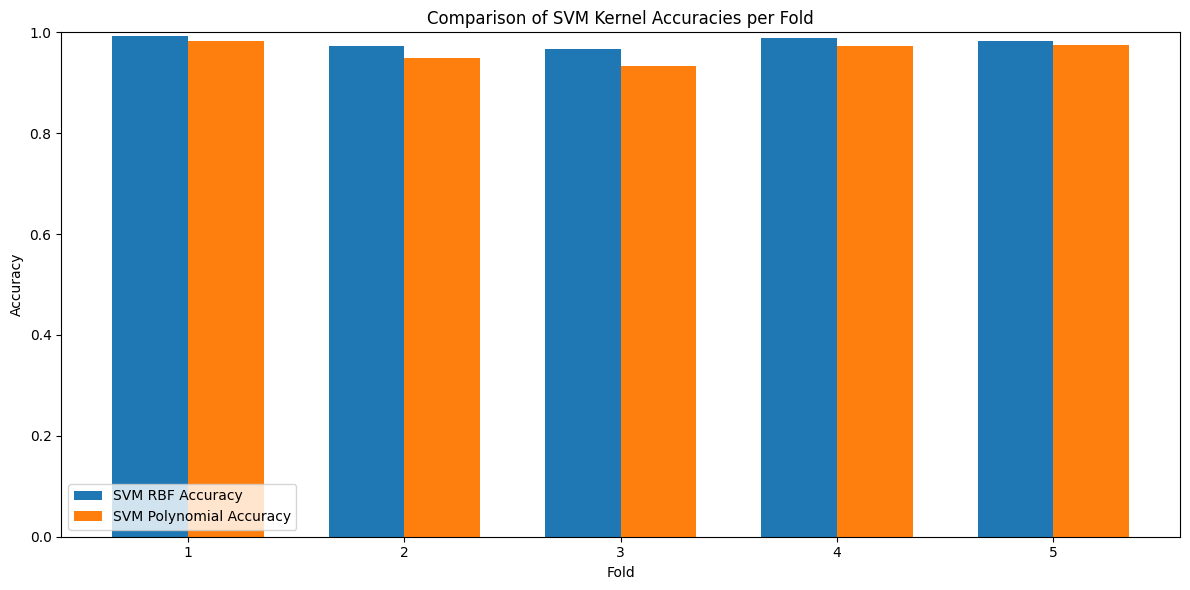

In [8]:
#Comparing Accuracies of RBF and Polynomial Kernel
import matplotlib.pyplot as plt
import numpy as np

# Number of folds
n_folds = len(accuracies_rbf)

# Prepare x-axis for the number of folds
folds = np.arange(1, n_folds + 1)

# Width of the bars
bar_width = 0.35

# Plotting
plt.figure(figsize=(12, 6))

# Bar graph for RBF and Polynomial kernel accuracies
plt.bar(folds - bar_width/2, accuracies_rbf, bar_width, label='SVM RBF Accuracy')
plt.bar(folds + bar_width/2, accuracies_poly, bar_width, label='SVM Polynomial Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernel Accuracies per Fold')
plt.xticks(folds)
plt.ylim([0, 1])  # Assuming accuracy is between 0 and 1
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()